## Machine Learning: Assignment Number 4

                                                                                                       Name:  Pradeesh P
                                                                                                   Roll No.:  CBENP2DSC22010

The Solution may be done in python/MATLAB.
Data Set
Iris Data Set
You may import from sklearn package or Download from https://archive.ics.uci.edu/ml/datasets/iris

#### Features

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

#### Classes

1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

#### Step : 1: 
Develop a classification model with Support Vector machine.

a) Analyse the performance with ‘linear’, ‘poly’, ‘rbf’, and ‘sigmoid’ kernels.

b) Evaluate accuracy, precision, recall and F 1 sore.

c) Plot the confusion matrix for each class.

#### Step : 2: 
Apply Singular Value Decomposition for Rank Reduction of the Matrix corresponding to the features.

a) Plot the graph of Singular values and Component number

b) Evaluate the size reduction obtained.

b) Perform Steps 1 (a) to 1 (c) in the reduced dataset.

In [1]:
#Importing all the dependencies

import pandas as pd
import numpy as np

#for importing data
from sklearn import datasets

#for normalizing data
from sklearn.preprocessing import Normalizer

#for spliting and training data
from sklearn.model_selection import train_test_split

# Importing the SVM model for training
from sklearn.svm import SVC

#for accuracy and other metrics calculations
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, ConfusionMatrixDisplay

#for ploting data
import matplotlib.pyplot as plt


In [2]:
# Load iris dataset
data = datasets.load_iris()
X = pd.DataFrame(data.data)
print(X.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [3]:
#storing Target value data
y = data.target

In [4]:
#normalizing data

nor = Normalizer()
X = nor.fit_transform(X)

In [5]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

,Accuracy,Precision,Recall,F1Score
Kernel,,,,
linear,0.566667,0.429825,0.566667,0.462667
poly,0.933333,0.933333,0.933333,0.933333
rbf,0.933333,0.95,0.933333,0.935317
sigmoid,0.2,0.04,0.2,0.066667


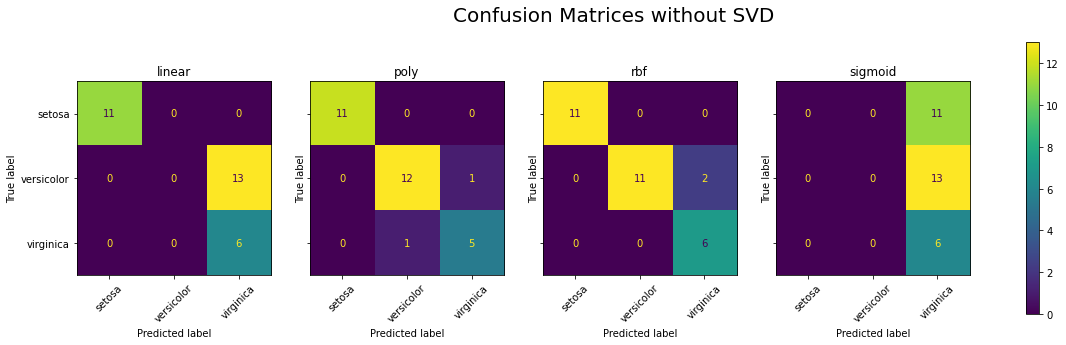

In [6]:
# training the model using different kernels and plotting their confusion matrix

# Making subplots for plotting 4 different confusion matrix in a row for 4 kernels in the SVM
fig, axs = plt.subplots(1, 4, figsize=(20, 5),sharey = 'row')

#List to store confusion matrix
cm = []

#declaring the list containing different kernels in SVM
ker = ['linear', 'poly', 'rbf', 'sigmoid' ]

#empty dataframe is declared to store the data of scores of the models
df_score = pd.DataFrame()

#looping with the training and modelling with diffrent kernels( i.e. 4 types in the list ker)
for k in range(4):
    
    scores = [] # empty list to store the values of scores obtained
    
    #creating SVM model with a type of kernel as per the list, training and predicting using same model
    
    model_SVC = SVC(kernel = ker[k])
    model_SVC.fit(X_train,y_train)
    y_pred = model_SVC.predict(X_test)
    
    #storing the different values of metrics in list score and finally appending the same in a dataframe(df_score)
    scores.append(ker[k])
    scores.append(accuracy_score(y_test,y_pred))
    scores.append(precision_score(y_test,y_pred,average = 'weighted',zero_division=0))
    scores.append(recall_score(y_test,y_pred,average = 'weighted',zero_division=0))
    scores.append(f1_score(y_test,y_pred,average = 'weighted',zero_division=0))
    df_score = pd.concat([df_score,pd.Series(scores)], axis =1)
    
    # Creating confusion matrix and plotting it
    cm.append(confusion_matrix(y_test,y_pred))
    cmdisp = ConfusionMatrixDisplay(confusion_matrix = cm[k], display_labels=data.target_names)
    # different matrix is plotted as per the subplot number and labels in x axis are made to rotate by 45 degrees
    cmdisp.plot(ax=axs[k], xticks_rotation=45)
    # Removing repeated color bar refrence for each plot
    cmdisp.im_.colorbar.remove()
    cmdisp.ax_.set_title(ker[k])

# Finally to draw one single color bar reference for all the subplots    
fig.colorbar(cmdisp.im_, ax=axs)

# Main title for all the subplots
fig.suptitle("Confusion Matrices without SVD ", fontsize=20) 

# Scores for different kernels    
df_score = df_score.T

#since scores are stored in column format we can just take the transpose of it
df_score.columns = ['Kernel','Accuracy','Precision','Recall','F1Score']

#Set index as the first column containing the Kernel Name 
df_score.set_index('Kernel',inplace = True)
df_score

### Singular Value Decomposition for Rank Reduction of the Matrix corresponding to the features

In [7]:
#Rank reduction of the Matrix using SVD
U,S,Vt = np.linalg.svd(X)
print(S)

[11.97354042  2.52930316  0.42713048  0.23348427]


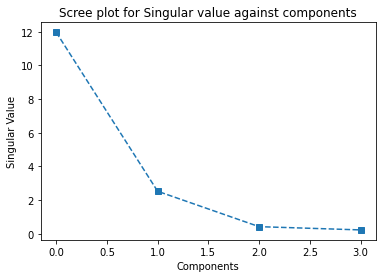

In [8]:
#plot Singular value scree plot to decide on component selection
plt.plot(S,'s--')

plt.title("Scree plot for Singular value against components")
plt.xlabel('Components')
plt.ylabel('Singular Value')

plt.show()


#### With the scree plot we could determine that the first three components are most important data

In [9]:
#taking data for only 3 out of 4 features in the main data

xnew = X[:,:-1]


print('Rank before SVD :',np.linalg.matrix_rank(X))
print('Rank after SVD :',np.linalg.matrix_rank(xnew))

Rank before SVD : 4
Rank after SVD : 3


***
#### We could see that the rank of the data has reduced from 4 to 3 after Singular value decomposition
***

In [10]:
#split the data for training
xtrain,xtest,ytrain,ytest = train_test_split(xnew,y, test_size = 0.2,  random_state = 1)

,Accuracy,Precision,Recall,F1Score
Kernel,,,,
linear_SVD,0.566667,0.429825,0.566667,0.462667
poly_SVD,0.9,0.933333,0.9,0.903478
rbf_SVD,0.866667,0.885606,0.866667,0.870635
sigmoid_SVD,0.2,0.04,0.2,0.066667


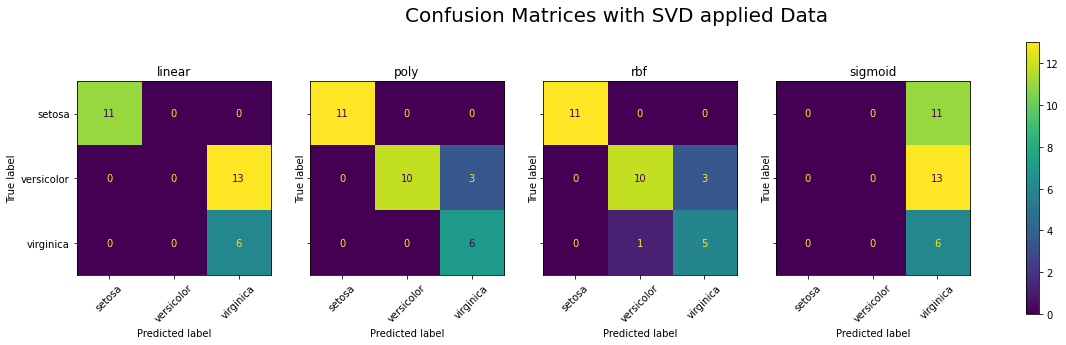

In [11]:
# training the model using different kernels and plotting their confusion matrix

# Making subplots for plotting 4 different confusion matrix in a row for 4 kernels in the SVM
fig, axs = plt.subplots(1, 4, figsize=(20, 5),sharey = 'row')

#declaring the list containing different kernels in SVM
ker = ['linear', 'poly', 'rbf', 'sigmoid' ] 

#empty dataframe is declared to store the data of scores of the models
df_score1 = pd.DataFrame()

#List to store confusion matrix
cm_svd = []

#looping with the training and modelling with diffrent kernels( i.e. 4 types in the list ker)
for k in range(4):
    
    scores = [] # empty list to store the values of scores obtained
    
    #creating SVM model with a type of kernel as per the list, training and predicting using same model
    
    model_SVC = SVC(kernel = ker[k])
    model_SVC.fit(xtrain,ytrain)
    ypred = model_SVC.predict(xtest)
    
    
    #storing the different values of metrics in list score and finally appending the same in a dataframe(df_score)
    scores.append(ker[k] + '_SVD')
    scores.append(accuracy_score(ytest,ypred))
    scores.append(precision_score(ytest,ypred,average = 'weighted',zero_division=0))
    scores.append(recall_score(ytest,ypred,average = 'weighted',zero_division=0))
    scores.append(f1_score(ytest,ypred,average = 'weighted',zero_division=0))
    df_score1 = pd.concat([df_score1,pd.Series(scores)], axis =1)
    
    # Creating confusion matrix and plotting it
    cm_svd.append(confusion_matrix(ytest,ypred))
    cmdisp = ConfusionMatrixDisplay(confusion_matrix = cm_svd[k], display_labels=data.target_names)
    # different matrix is plotted as per the subplot number and labels in x axis are made to rotate by 45 degrees
    cmdisp.plot(ax=axs[k], xticks_rotation=45)
    # Removing repeated color bar refrence for each plot
    cmdisp.im_.colorbar.remove() 
    cmdisp.ax_.set_title(ker[k])
    
# Finally to draw one single color bar reference for all the subplots
fig.colorbar(cmdisp.im_, ax=axs)

# Main title for all the subplots
fig.suptitle("Confusion Matrices with SVD applied Data", fontsize=20)    

#since scores are stored in column format we can just take the transpose of it    
df_score1 = df_score1.T

#delcaring the column names of dataframe
df_score1.columns = ['Kernel','Accuracy','Precision','Recall','F1Score']

#Set index as the first column containing the Kernel Name 
df_score1.set_index('Kernel',inplace = True)
df_score1

## Printing the scores and confusion matrices for all at once

Scores without SVD 

         Accuracy Precision    Recall   F1Score
Kernel                                         
linear   0.566667  0.429825  0.566667  0.462667
poly     0.933333  0.933333  0.933333  0.933333
rbf      0.933333      0.95  0.933333  0.935317
sigmoid       0.2      0.04       0.2  0.066667 

Scores with SVD 

             Accuracy Precision    Recall   F1Score
Kernel                                             
linear_SVD   0.566667  0.429825  0.566667  0.462667
poly_SVD          0.9  0.933333       0.9  0.903478
rbf_SVD      0.866667  0.885606  0.866667  0.870635
sigmoid_SVD       0.2      0.04       0.2  0.066667


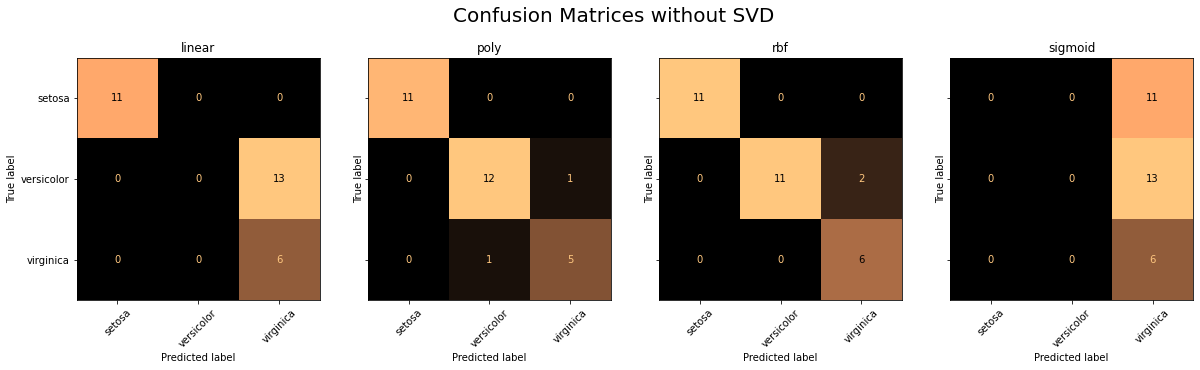

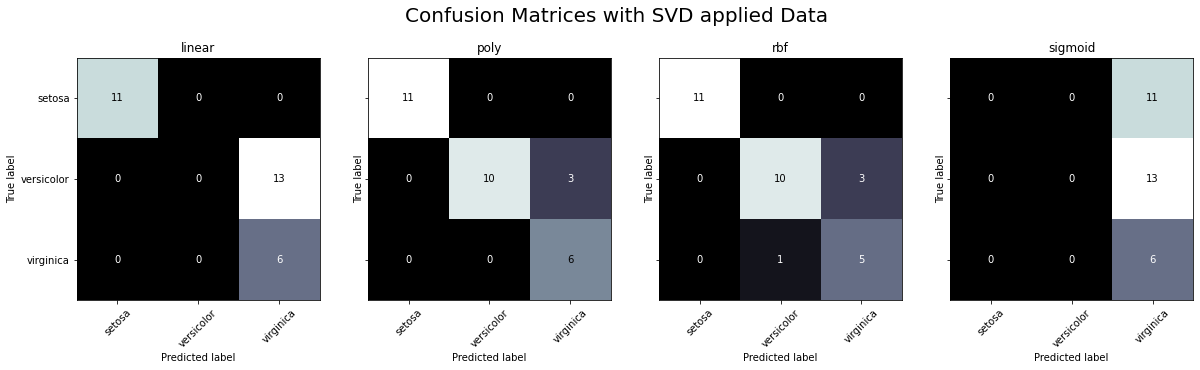

In [12]:

# Making subplots for plotting 4 different confusion matrix in a row for 4 kernels in the SVM
fig, axs = plt.subplots(1, 4, figsize=(20, 5),sharey = 'row')
for i in range(4):
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm[i], display_labels=data.target_names)
    cmd.plot(ax=axs[i], xticks_rotation=45, cmap = 'copper')
    # Removing repeated color bar refrence for each plot
    cmd.im_.colorbar.remove() 
    cmd.ax_.set_title(ker[i])
    
    
# Finally to draw one single color bar reference for all the subplots
#fig.colorbar(cmdisp.im_, ax=axs)

# Main title for all the subplots
fig.suptitle("Confusion Matrices without SVD ", fontsize=20) 

fig, axs = plt.subplots(1, 4, figsize=(20, 5),sharey = 'row')
for i in range(4):
    
    cmd_svd = ConfusionMatrixDisplay(confusion_matrix = cm_svd[i], display_labels=data.target_names)
    cmd_svd.plot(ax = axs[i], xticks_rotation=45, cmap = 'bone')
    cmd_svd.im_.colorbar.remove() 
    cmd_svd.ax_.set_title(ker[i])
    
    
#fig.colorbar(cmdisp.im_, ax=axs)
# Main title for all the subplots
fig.suptitle("Confusion Matrices with SVD applied Data", fontsize=20) 

print('Scores without SVD \n')
print(df_score,'\n')
print('Scores with SVD \n')
print(df_score1)